# 反转策略和动量策略在A股的实践

<font color=black size=5 face=楷体>小组成员信息
    
<font color=black size=4 face=楷体>谭卓尔（2020213444）
    王玮璇（2019212939）
    周剑波（2020213462）
    唐铭泽（2020213445）
    陈玥雯（2020213430）
    
<font color=black size=4 face=楷体>欧盈池（2020213442）

# 一、文献回顾

<font color=black size=3 face=楷体>DeBond和Thalter（1985）收集了1926年至1982年纽约证券交易所的股票数据，并对所有上市公司过去三年的累计超常收益率（以下简称‘CARs’）进行了排名。其中CARs最高的35家公司的股票被视为“赢家组合”，而CARs价格最低的35家公司的股票则作为“输家组合”。紧接着，DeBond和Thalter对两个组合在未来三年内的收益进行测试之后发现：在三年的测试期中，“赢家组合”的结果为低于市场平均回报大约5%,而“输家组合”则高于市场平均回报大约19.6%，两者的报酬率相差高达25%。这个结果表明了：过去3-5年表现较好的股票（赢家），在未来3-5年的表现反而会变差，相反过去3-5年表现较差的股票（输家）在未来3-5 年的表现将会转好。这也是反转效应的首次提出。</font>
 
<font color=black size=3 face=楷体> 而Jegadeesh和Titman（1993）则将1965至1989年的纽约证券交易所和美国证券交易所的股票数据作为样本，并对其进行“赢者买，输者卖”的策略，即在短期内(3-12个月)买入价格上涨的股票，在短期内卖出价格下跌的股票。结果表明，这种策略获得的超额收益具有统计学意义。此外，他们也证明了该策略的成功是由于股价对公司信息和公告的滞后反应，而非受到由于正常收益的两个影响因素，即较高的系统性风险或股价对市场公开因素存在滞后反应的影响。</font>

<font color=black size=3 face=楷体>在反转效应和动量效应提出后，国内外学者对于两者以及对应的反转策略和惯性策略进行了许多检验，例如王永宏和赵学军( 2001) 以深沪两市1993年以前上市的全部A 股为研究样本, 分别考察了1993年到2000年之间的惯性收益和反转收益, 发现只有反转策略显著, 而惯性策略不显著。但是由于我国股市的上市股票在1993年之前仅为53支，该项研究的样本量不足；刘博和皮天雷（2007）则修正了DeBond和Thalter的研究方法，将1994年至2005年所有的上海和深圳股票的全样本数据作为研究样本, 使用了购买并持有策略的收益率作为研究指标，对沪深A 股市场是否存在惯性现象和反转现象进行了检验，得到了：中国A股市场基本不存在惯性现象, 而存在显著的反转现象的结论；谭小芬和林雨菲（2012）则通过模拟上证180指数交易，发现中国A 股市场短期（4个月以下）存在反转效应，中期（6个月到1年)存在动量效应。可见不同时期对于A股市场的反转效应和动量效应的结果也有所不同。</font>


# 二、样本筛选

### 留未ST，商誉占比<40%，大股东质押比例<70%，审计意见标准的股票
### 最终选出3319只股票

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [2]:
data = pd.read_excel('排雷.xlsx')
data.head()

,证券代码,证券简称,商誉（亿元）,资产总计（亿元）,商誉占比%,大股东累计质押数占持股数比例%,审计意见类别
0,000001.SZ,平安银行,75.68,"43,469.21",0.17,nan,标准无保留意见
1,000002.SZ,万科A,2.15,"18,144.66",0.01,nan,标准无保留意见
2,000004.SZ,国华网安,9.87,15.48,63.77,0.00,标准无保留意见
3,000005.SZ,世纪星源,2.25,29.39,7.65,100.00,保留意见
4,000006.SZ,深振业A,nan,154.02,0.00,nan,标准无保留意见


In [3]:
data.rename(columns={'证券代码':'ticker','证券简称':'company','商誉占比%':'goodwill', '大股东累计质押数占持股数比例%':'pledge','审计意见类别':'audit'}, inplace = True)
data['company'] = data['company'].astype(str)
data['ST'] = data['company'].apply(lambda x: x.split('T')[0])
data['ST'] = data['ST'].apply(lambda x: x[-1:])
data.loc[data['ST'] == 'S','whetherST'] = 'yes'
data.loc[data['ST'] != 'S','whetherST'] = 'no'
data['pledge'].fillna(0,inplace = True)

In [4]:
data_stock = data.loc[(data['whetherST'] == 'no')&(data['goodwill'] < 40)&(data['pledge'] < 70)&(data['audit'] == '标准无保留意见')]
data_stock.head(10)

,ticker,company,商誉（亿元）,资产总计（亿元）,goodwill,pledge,audit,ST,whetherST
0,000001.SZ,平安银行,75.68,"43,469.21",0.17,0.00,标准无保留意见,行,no
1,000002.SZ,万科A,2.15,"18,144.66",0.01,0.00,标准无保留意见,A,no
4,000006.SZ,深振业A,nan,154.02,0.00,0.00,标准无保留意见,A,no
6,000008.SZ,神州高铁,36.63,122.66,29.86,0.00,标准无保留意见,铁,no
7,000009.SZ,中国宝安,4.88,314.93,1.55,0.00,标准无保留意见,安,no
8,000010.SZ,美丽生态,2.03,44.98,4.51,0.00,标准无保留意见,态,no
9,000011.SZ,深物业A,nan,122.15,0.00,0.00,标准无保留意见,A,no
10,000012.SZ,南玻A,3.15,181.43,1.74,0.00,标准无保留意见,A,no
11,000014.SZ,沙河股份,nan,21.71,0.00,0.00,标准无保留意见,份,no
12,000016.SZ,深康佳A,7.79,447.85,1.74,0.00,标准无保留意见,A,no


In [5]:
num=data_stock.shape[0]
print('经过初步筛选，总共有'+str(num)+'只股票被选中')

经过初步筛选，总共有3492只股票被选中


In [6]:
data_stock.set_index(['ticker'],inplace = True)

In [8]:
stock_list=data_stock.company.keys().tolist()
stock_list

['000001.SZ',
 '000002.SZ',
 '000006.SZ',
 '000008.SZ',
 '000009.SZ',
 '000010.SZ',
 '000011.SZ',
 '000012.SZ',
 '000014.SZ',
 '000016.SZ',
 '000019.SZ',
 '000021.SZ',
 '000025.SZ',
 '000026.SZ',
 '000027.SZ',
 '000028.SZ',
 '000029.SZ',
 '000030.SZ',
 '000031.SZ',
 '000032.SZ',
 '000034.SZ',
 '000036.SZ',
 '000037.SZ',
 '000039.SZ',
 '000042.SZ',
 '000045.SZ',
 '000048.SZ',
 '000049.SZ',
 '000050.SZ',
 '000055.SZ',
 '000058.SZ',
 '000059.SZ',
 '000060.SZ',
 '000061.SZ',
 '000062.SZ',
 '000063.SZ',
 '000065.SZ',
 '000066.SZ',
 '000068.SZ',
 '000069.SZ',
 '000070.SZ',
 '000088.SZ',
 '000089.SZ',
 '000090.SZ',
 '000096.SZ',
 '000099.SZ',
 '000100.SZ',
 '000151.SZ',
 '000153.SZ',
 '000155.SZ',
 '000156.SZ',
 '000157.SZ',
 '000158.SZ',
 '000159.SZ',
 '000166.SZ',
 '000301.SZ',
 '000333.SZ',
 '000338.SZ',
 '000400.SZ',
 '000401.SZ',
 '000402.SZ',
 '000404.SZ',
 '000407.SZ',
 '000409.SZ',
 '000411.SZ',
 '000417.SZ',
 '000419.SZ',
 '000420.SZ',
 '000421.SZ',
 '000423.SZ',
 '000425.SZ',
 '0004

# 三、通过Wind下载数据

### 通过API接口，下载2001年1月至2020年9月全部A股的数据
### 字段包括：股票代码、交易日期、开盘价、最高价、最低价、收盘价、涨跌幅、成交量、成交额，并将每一只股票保存成独立的csv文件

In [ ]:
import pandas as pd
import WindPy
from WindPy import w
w.start()

In [ ]:
for i in stock_list:
    x=w.wsd(i, "pre_close,open,high,low,close,volume,amt,chg,pct_chg,turn", "2001-01-02", "2020-09-29", "")
    df=pd.DataFrame(x.Data,index=x.Fields,columns=x.Times).T
    df['Stkcd']=i#增加一列是股票代码
    df.to_excel(i+'all_data.csv')

### 由于下载的数据日期为Index而非单独的一列，批量对所有文件进行处理，并将修改后的文件放在新的文件夹中

In [ ]:
for code in stock_list:
    stock_data=pd.read_csv('C:/Users./SUFEW/Desktop/stock_data_try/'+ code + 'all_data.csv')
    stock_data.rename(columns={'Unnamed: 0':"date"},inplace=True)
    print(stock_data.head())
    stock_data.to_csv('C:/Users./SUFEW/Desktop/All_data/'+code+'.csv',index=False)

# 四、比较动量策略和反转策略 -- 以5年9个月为例

In [13]:
import os
import pandas as pd
from math import floor
import numpy as np

In [11]:
#获取股票数据
def get_stock_data():
    # 遍历数据文件夹中所有股票文件的文件名，得到股票代码列表
    stock_code_list = []
    # 此处为股票数据文件的本地路径，请自行修改
    for root, dirs, files in os.walk(r'C:\Users\SUFEW\Desktop\All_data/'):
        if files:
            for f in files:
                if '.csv' in f:
                    stock_code_list.append(f.split('.csv')[0])

    all_stock = pd.DataFrame()

    for code in stock_code_list:
        # 此处为股票数据文件的本地路径，请自行修改
        stock_data = pd.read_csv(r'C:\Users\SUFEW\Desktop\All_data/' + code + '.csv', parse_dates=['date'])
        stock_data['PCT_CHG']=stock_data['PCT_CHG']/100 #收益率除以100
        stock_data = stock_data[['date', 'OPEN', 'CLOSE', 'PCT_CHG']].sort_values(by='date')
       
        stock_data.reset_index(drop=True, inplace=True)
        # 计算复权价
        #stock_data[['OPEN', 'CLOSE']] = cal_right_price(stock_data, type='后复权')
        # 判断每天开盘是否涨停
        stock_data.loc[stock_data['OPEN'] > stock_data['CLOSE'].shift(1) * 1.097, 'limit_up'] = 1
        stock_data['limit_up'].fillna(0, inplace=True)
        
        stock_data['Stkcd'] = code

        all_stock = all_stock.append(stock_data, ignore_index=True)

    return all_stock[[ 'date', 'PCT_CHG', 'limit_up','Stkcd']]

In [12]:
all_stock = get_stock_data()

In [24]:
def momentum_and_contrarian(all_stock, start_date, end_date, window=3):    #3个月排名
    """
    :param all_stock: 所有股票的数据集
    :param start_date: 起始日期（包含排名期）
    :param end_date: 结束日期
    :param window: 排名期的月份数，默认为3个月
    :return: 返回动量策略和反转策略的收益率和资金曲线
    """
    # 取出指数数据作为交易天数的参考标准, 此处为指数数据文件的本地路径，请自行修改
    index_data = pd.read_excel(r'C:\Users\SUFEW\Desktop\All_data\000001.SH.xlsx', parse_dates=True, index_col='date')
    index_data['CHG']=index_data['CHG']/100#收益率除以100
    index_data.sort_index(inplace=True)
    index_data = index_data[start_date:end_date]
    # 转换成月度数据
    by_month = index_data[['CLOSE']].resample('M').last()
#     by_month = index_data[['CLOSE']].resample('M')
    by_month.reset_index(inplace=True)

    momentum_portfolio_all = pd.DataFrame()
    contrarian_portfolio_all = pd.DataFrame()

    for i in range(window, len(by_month) - 1):
        start_month = by_month['date'].iloc[i - window]  # 排名期第一个月
        end_month = by_month['date'].iloc[i]  # 排名期最后一个月

        # 取出在排名期内的数据
        stock_temp = all_stock[(all_stock['date'] > start_month) & (all_stock['date'] <= end_month)]

        # 将指数在这段时间的数据取出作为交易日天数的标准
        index_temp = index_data[start_month:end_month]

        # 统计每只股票在排名期的交易日天数
        trading_days = stock_temp['Stkcd'].value_counts()
        # 剔除在排名期内累计停牌超过（5*月数）天的股票，即如果排名期为3个月，就剔除累计停牌超过15天的股票
        keep_list = trading_days[trading_days >= (len(index_temp) - 5 * window)].index
        stock_temp = stock_temp[stock_temp['Stkcd'].isin(keep_list)]

        # 计算每只股票在排名期的累计收益率
        grouped = stock_temp.groupby('Stkcd')['PCT_CHG'].agg([('return', lambda x: (x + 1).prod() - 1)])
        # 将累计收益率排序
        grouped.sort_values(by='return', inplace=True)
        # 取排序后前5%的股票构造反转策略的组合，后5%的股票构造动量策略的组合
        num = floor(len(grouped) * 0.05)
        momentum_code_list = grouped.index[-num:]  # 动量组合的股票代码列表
        contrarian_code_list = grouped.index[0:num]  # 反转组合的股票代码列表

        # ============================动量组合============================
        # 取出动量组合内股票当月的数据
        momentum = all_stock.loc[(all_stock['Stkcd'].isin(momentum_code_list)) &
                                (all_stock['date'] > end_month) & (all_stock['date'] <= by_month['date'].iloc[i + 1])]

        # 剔除动量组合里在当月第一个交易日涨停的股票
        temp = momentum.groupby('Stkcd')['limit_up'].first()
        hold_list = temp[temp == 0].index
        momentum = momentum[momentum['Stkcd'].isin(hold_list)].reset_index(drop=True)
        # 动量组合
        momentum_portfolio = momentum.pivot_table(index='date', columns='Stkcd', values='PCT_CHG',aggfunc=sum).fillna(0)

        # 计算动量组合的收益率
        num = momentum_portfolio.shape[1]
        weights = num * [1. / num]
        momentum_portfolio['pf_rtn'] = np.dot(np.array(momentum_portfolio), np.array(weights))
        momentum_portfolio.reset_index(inplace=True)

        # 将每个月的动量组合收益数据合并
        momentum_portfolio_all = momentum_portfolio_all.append(momentum_portfolio[['date', 'pf_rtn']],
                                                               ignore_index=True)
        # 计算动量策略的资金曲线
        momentum_portfolio_all['capital'] = (1 + momentum_portfolio_all['pf_rtn']).cumprod()

        # ============================反转组合=============================
        # 取出反转组合内股票当月的数据
        contrarian = all_stock.loc[(all_stock['Stkcd'].isin(contrarian_code_list)) &
                                  (all_stock['date'] > end_month) & (all_stock['date'] <= by_month['date'].iloc[i + 1])]

        # 剔除反转组合里在当月第一个交易日涨停的股票
        temp = contrarian.groupby('Stkcd')['limit_up'].first()
        hold_list = temp[temp == 0].index
        contrarian = contrarian[contrarian['Stkcd'].isin(hold_list)].reset_index(drop=True)
        # 反转组合
        contrarian_portfolio = contrarian.pivot_table(index='date', columns='Stkcd', values='PCT_CHG',aggfunc=sum).fillna(0)

        # 计算反转组合的收益率
        num = contrarian_portfolio.shape[1]
        weights = num * [1. / num]
        contrarian_portfolio['pf_rtn'] = np.dot(np.array(contrarian_portfolio), np.array(weights))
        contrarian_portfolio.reset_index(inplace=True)

        # 将每个月的反转组合收益合并
        contrarian_portfolio_all = contrarian_portfolio_all.append(contrarian_portfolio[['date', 'pf_rtn']],
                                                                   ignore_index=True)
        # 计算反转策略的资金曲线
        contrarian_portfolio_all['capital'] = (1 + contrarian_portfolio_all['pf_rtn']).cumprod()

    return momentum_portfolio_all, contrarian_portfolio_all

In [25]:
m, c = momentum_and_contrarian(all_stock,  '2015-9-30', '2020-9-29', window=9)

### 定义回测公式（年化收益率、最大回撤、夏普比率）

In [26]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt


# 计算年化收益率函数
def annual_return(date_line, capital_line):
    """
    :param date_line: 日期序列
    :param capital_line: 账户价值序列
    :return: 输出在回测期间的年化收益率
    """
    # 将数据序列合并成dataframe并按日期排序
    df = pd.DataFrame({'date': date_line, 'capital': capital_line})

    # 计算年化收益率
    annual = (df['capital'].iloc[-1] / df['capital'].iloc[0]) ** (250 / len(df)) - 1
    print ('年化收益率为：%f' % annual)


# 计算最大回撤函数
def max_drawdown(date_line, capital_line):
    """
    :param date_line: 日期序列
    :param capital_line: 账户价值序列
    :return: 输出最大回撤及开始日期和结束日期
    """
    # 将数据序列合并为一个dataframe
    df = pd.DataFrame({'date': date_line, 'capital': capital_line})

    df['max2here'] = df['capital'].cummax()  # 计算当日之前的账户最大价值
    df['dd2here'] = df['capital'] / df['max2here'] - 1  # 计算当日的回撤

    # 计算最大回撤和结束时间
    temp = df.sort_values(by='dd2here').iloc[0][['date', 'dd2here']]
    max_dd = temp['dd2here']
    end_date = temp['date'].strftime('%Y-%m-%d')

    # 计算开始时间
    df = df[df['date'] <= end_date]
    start_date = df.sort_values(by='capital', ascending=False).iloc[0]['date'].strftime('%Y-%m-%d')

    print ('最大回撤为：%f, 回撤开始日期：%s, 回撤结束日期：%s' % (max_dd, start_date, end_date))



# 计算夏普比函数
def sharpe_ratio(date_line, capital_line, return_line):
    """
    :param date_line: 日期序列
    :param capital_line: 账户价值序列
    :param return_line: 账户日收益率序列
    :return: 输出夏普比率
    """
    # 将数据序列合并为一个dataframe并按日期排序
    df = pd.DataFrame({'date': date_line, 'capital': capital_line, 'rtn': return_line})

    rf = 0.031798  # 无风险利率取10年期国债的到期年化收益率
    # 账户年化收益
    annual_stock = (df['capital'].iloc[-1] / df['capital'].iloc[0]) ** (250 / len(df)) - 1
    # 计算收益波动率
    vol = df['rtn'].std() * sqrt(250)
    # 计算夏普比
    sharpe = (annual_stock - rf) / vol
    print ('sharpe_ratio: %f' % sharpe)




### 计算回测效果


=====================动量策略主要回测指标=====================
年化收益率为：-0.099766
最大回撤为：-0.576999, 回撤开始日期：2016-07-07, 回撤结束日期：2019-01-03
sharpe_ratio: -0.462485

=====================反转策略主要回测指标=====================
年化收益率为：0.031053
最大回撤为：-0.511326, 回撤开始日期：2016-11-22, 回撤结束日期：2018-10-18
sharpe_ratio: -0.002804

=====================同期上证指数主要回测指标=====================
年化收益率为：0.023139
最大回撤为：-0.307659, 回撤开始日期：2018-01-24, 回撤结束日期：2019-01-03
sharpe_ratio: -0.050904


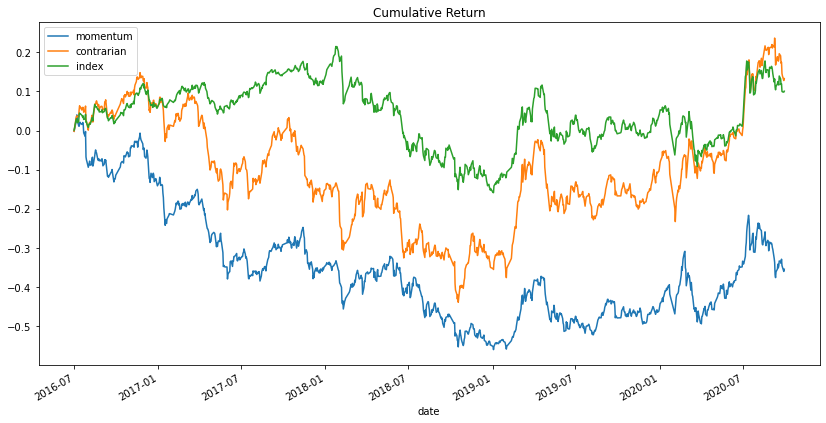

In [27]:
date_line = list(m['date'])
capital_line = list(m['capital'])
return_line = list(m['pf_rtn'])
print ('\n=====================动量策略主要回测指标=====================')
annual_return(date_line, capital_line)
max_drawdown(date_line, capital_line)
sharpe_ratio(date_line, capital_line, return_line)

date_line = list(c['date'])
capital_line = list(c['capital'])
return_line = list(c['pf_rtn'])
print ('\n=====================反转策略主要回测指标=====================')
annual_return(date_line, capital_line)
max_drawdown(date_line, capital_line)
sharpe_ratio(date_line, capital_line, return_line)

# 同期大盘的相关指标
index_data = pd.read_excel(r'C:\Users\SUFEW\Desktop\All_data\000001.SH.xlsx', parse_dates=['date'])
index_data['CHG']=index_data['CHG']/100
index_data.sort_values(by='date', inplace=True)
index_data = index_data[index_data['date'].isin(date_line)]
capital_line = list(index_data['CLOSE'])
return_line = list(index_data['CHG'])
print ('\n=====================同期上证指数主要回测指标=====================')
annual_return(date_line, capital_line)
max_drawdown(date_line, capital_line)
sharpe_ratio(date_line, capital_line, return_line)

plt.figure(figsize=(14, 7))
m.set_index('date', inplace=True)
c.set_index('date', inplace=True)
index_data['cum_ret'] = (index_data['CHG'] + 1).cumprod() - 1
index_data.set_index('date', inplace=True)

(m['capital'] - 1).plot()
(c['capital'] - 1).plot()
index_data['cum_ret'].plot()
plt.title('Cumulative Return')
plt.legend(['momentum', 'contrarian', 'index'], loc='best')
#plt.legend(['momentum', 'contrarian', 'index'], loc='best')
plt.show()

# 五、 总结

### 首先有两个特殊时期值得注意：1.2015年股价的股灾；2.2020年疫情

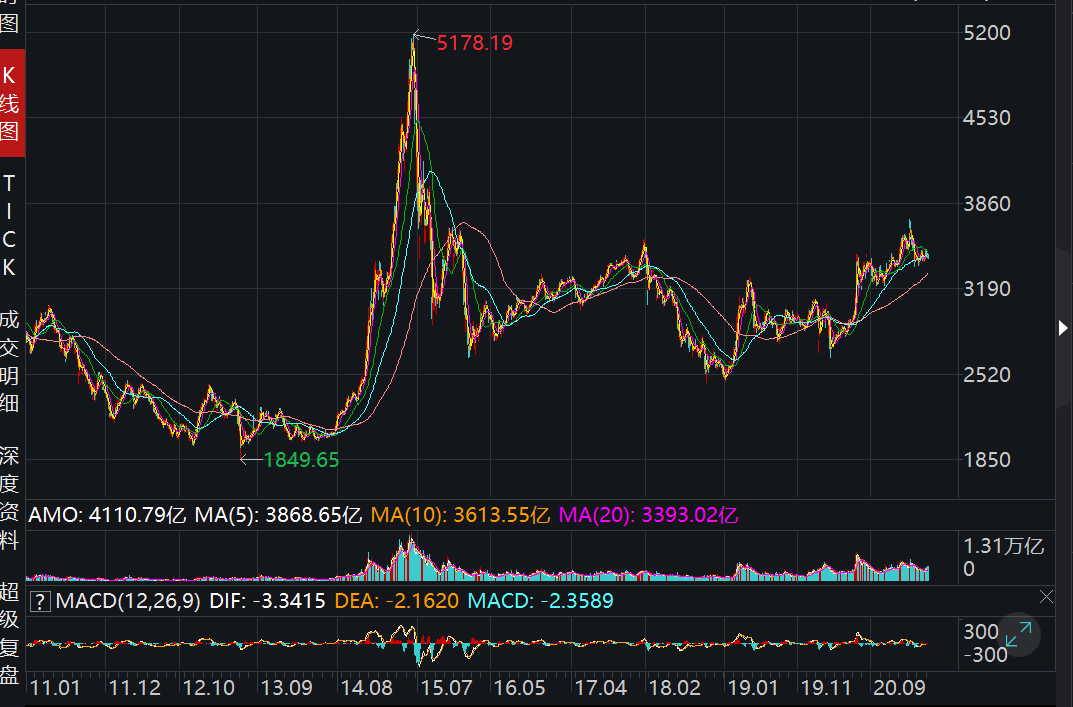

## 我们尝试了不同的年份和window

##  5年3个月

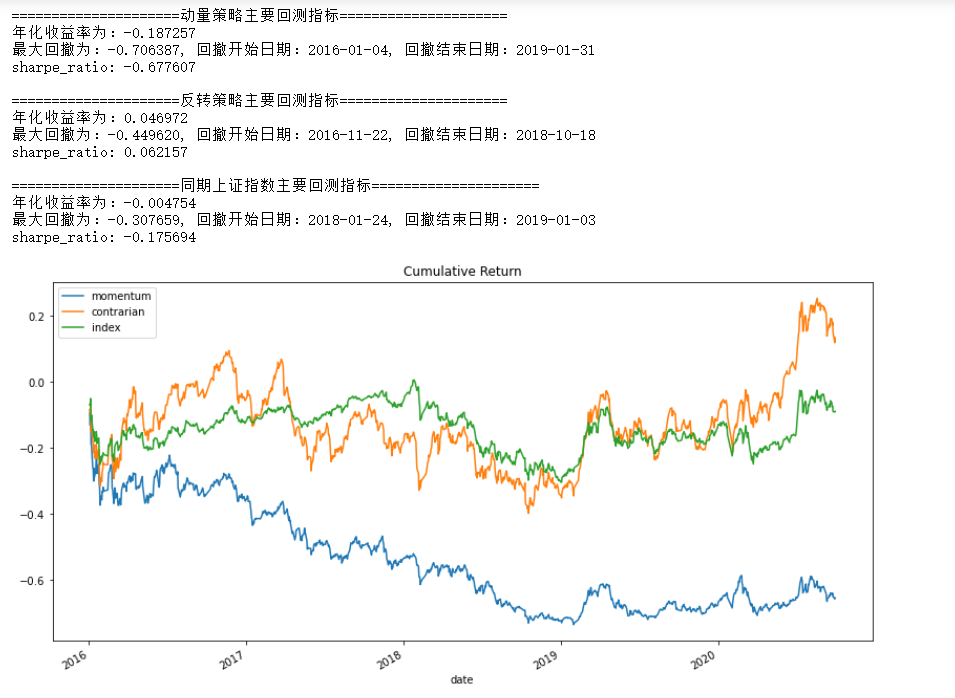

## 5年6个月

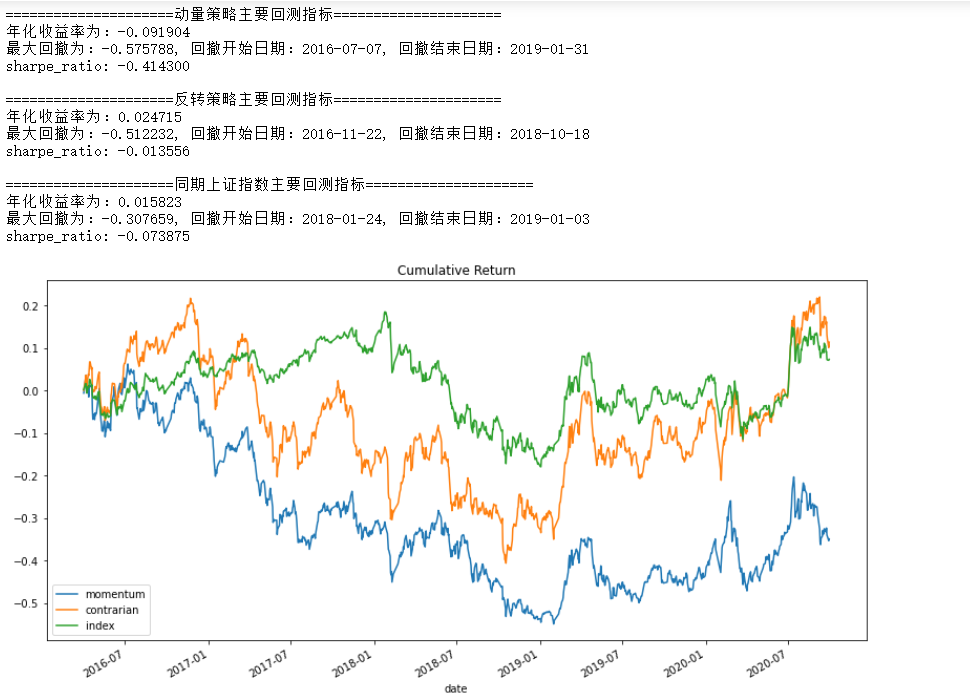

## 5年9个月

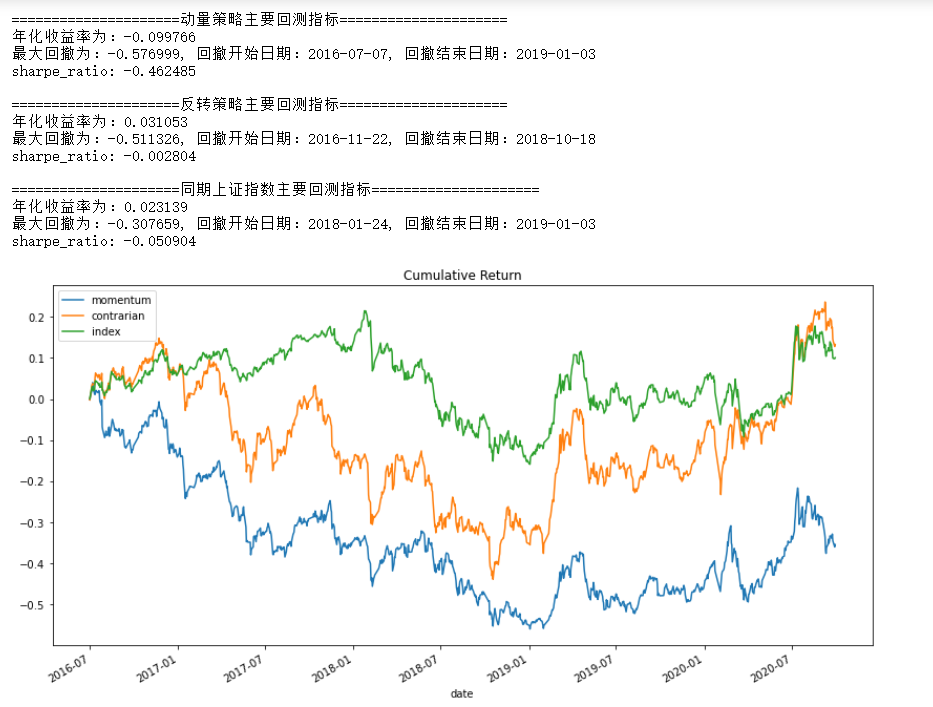

## 10年3个月

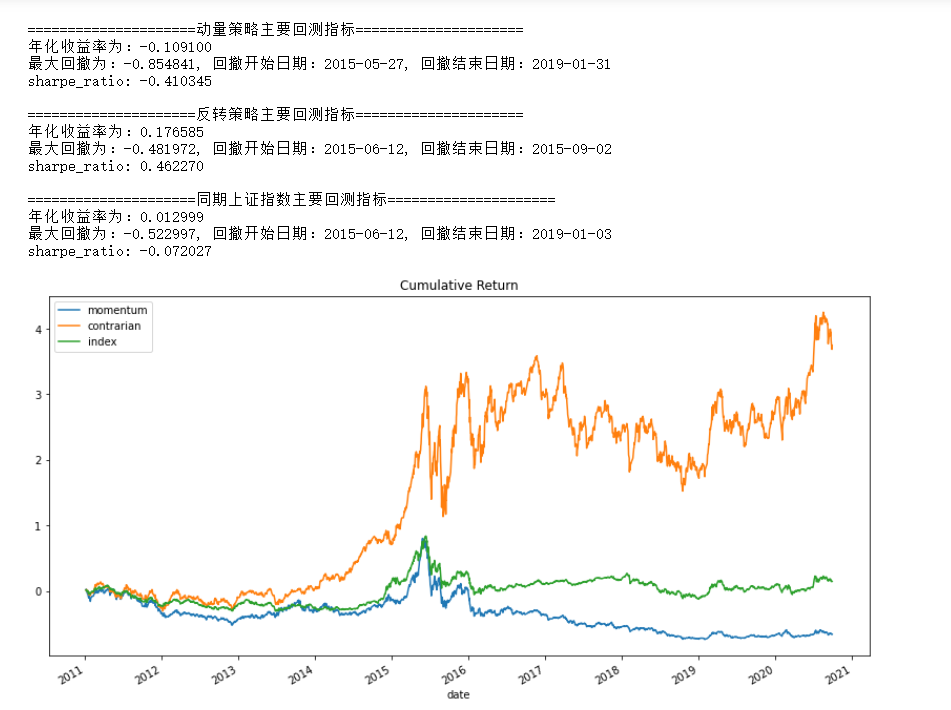

## 10年6个月

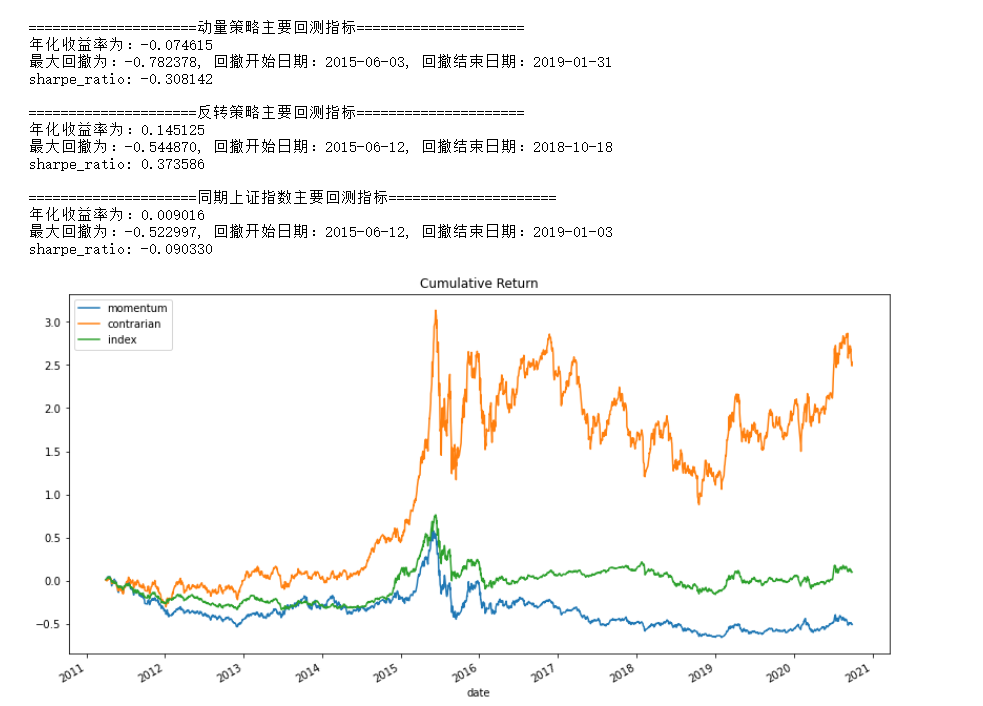

## 10年9个月

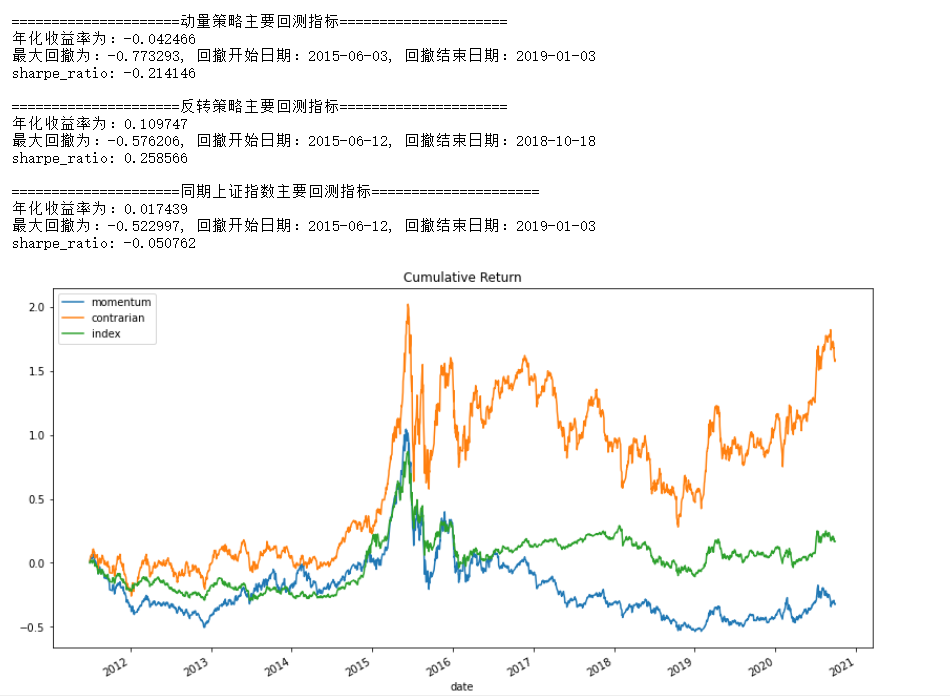

## 10年12个月

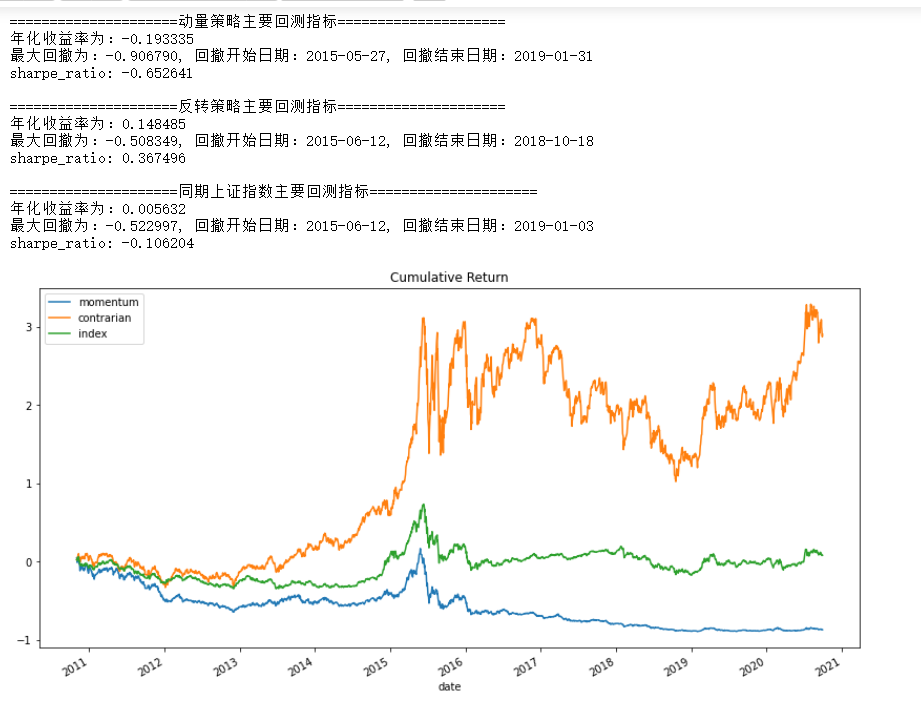

## 我们得出了四个比较重要的结论

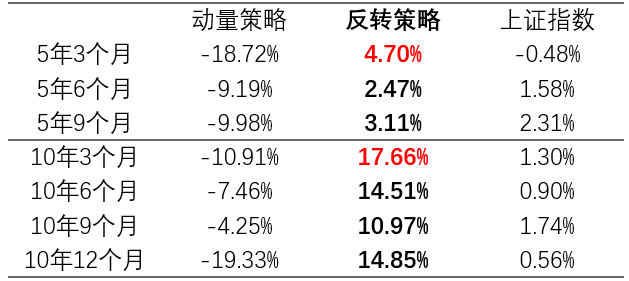

<font color=black size=4 face=楷体> 1. 我们发现，无论期间长度为5年期或10年期，Window取多长时间，反转策略的年化收益率都好于动量策略。
    
<font color=black size=4 face=楷体> 2.比较10年期和5年期，我们可以发现虽然反转策略都好于动量策略，但是5年期反转策略的累计收益率曲线要低于上证综指，我们有两点解释：
    
1）虽然累积收益率曲线低于指数，但是年化收益率高于指数。
    
2）15年股灾前反转策略较为优秀。
    
<font color=black size=4 face=楷体>3.我们选择了不同的排名期（window)进行测试，发现反转策略3个月的年化收益率表现最好，证明市场对信息的反应速度较快。
 
<font color=black size=4 face=楷体>4.我们发现牛市的时候，比如2015年股价的大幅上涨/2020年后疫情期间的牛市背景下，反转策略的表现很突出，累计收益曲线上升较快。而熊市的时候，比如15年的熊市/17年的熊市背景下，反转策略的累计收益下降速度较快。

## 不足

<font color=black size=4 face=楷体>不足之一：未考虑交易成本。现实生活中，每次进行调仓都需要缴纳手续费（付给券商的佣金）+印花税，但是在我们的实证过程中未考虑到这一点，然而交易费用实际上会对收益率造成影响，所以结果不是特别精确。
    
<font color=black size=4 face=楷体>不足之二：在对动量和反转策略的验证过程中，由于能力有限，我们只选取了5年和10年的3个月、6个月、9个月的观察期以及1个月的持有期，因此我们目前得到的结果可能并不是最优的策略，可以通过调整更多的参数对模型进行进一步优化。

## 选股建议

<font color=black size=4 face=楷体>基于上述实证研究，我们发现A股中反转策略效果显著。可以以此为参考，以沪深300为股票池，以3个月为排名期，1个月为持有期创建投资组合。


## 参考文献

【1】WERNER F. M. De BONDT and RICHARD THALER. Does the Stock Market Overreact? ［J］. Journal of Finance,1985,40(3):793-808

【2】Jegadeesh N，Titman，S. Returns to Buying Winners and Selling Losers: Implications for Stock Market Efficiency
［J］. Journal of Finance，1993，48(1):65－91.

【3】刘博，皮天雷.惯性策略和反转策略:来自中国沪深A 股市场的新证据［J］.金融研究，2007（8）：154-166

【4】王永宏，赵永军.中国股市“惯性策略”和“反转策略”的实证分析［J］.经济研究，2001（6）：56-61,89

【5】谭小芬，林雨菲.中国A 股市场动量效应和反转效应的实证研究及其理论解释 ［J］.中国软科学，2012（8）：45-57